# Library needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import tensorflow as tf
import cv2

from skimage import  color
from skimage.transform import rescale, resize

from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')
%config completer.use_jedi=False
%matplotlib inline

# Connect to driver

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from locale import D_T_FMT
df=pd.read_csv("/content/drive/MyDrive/BDSaS/S3/DM/DataSet/mitbih_train.csv",header=None)

In [ ]:
tst=pd.read_csv("/content/drive/MyDrive/BDSaS/S3/DM/DataSet/mitbih_test.csv",header=None)

* show first 10 raws

In [ ]:
df.head(10)

# Classes of the target

In [ ]:
df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

# Translate Data ECG to Images (Data Training)

In [ ]:
class0=df[df.iloc[:,187]==0.0]
for i in tqdm(range(6000)):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe0/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class1.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe0/{i}.png')
      plt.close(fig)

100%|██████████| 6000/6000 [05:07<00:00, 19.53it/s]


In [ ]:
class1=df[df.iloc[:,187]==1.0]
for i in tqdm(range(class1.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe1/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class1.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe1/{i}.png')
      plt.close(fig)

100%|██████████| 2223/2223 [01:45<00:00, 21.03it/s]


In [ ]:
class2=df[df.iloc[:,187]==2.0]
for i in tqdm(range(class2.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe2/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class2.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe2/{i}.png')
      plt.close(fig)

100%|██████████| 5788/5788 [04:41<00:00, 20.60it/s]


In [ ]:
class3=df[df.iloc[:,187]==3.0]
for i in tqdm(range(class3.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe3/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class3.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe3/{i}.png')
      plt.close(fig)

100%|██████████| 641/641 [00:38<00:00, 16.66it/s]


In [ ]:
class4=df[df.iloc[:,187]==4.0]
for i in tqdm(range(class4.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe4/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class4.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/classe4/{i}.png')
      plt.close(fig)

100%|██████████| 6431/6431 [05:08<00:00, 20.84it/s]


# Show an example of image obtained after translation 

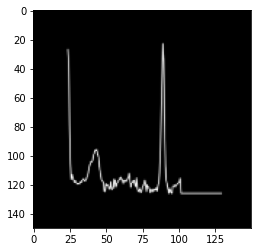

In [ ]:
image=plt.imread('/content/1.png')
image = color.rgb2gray(image)
image=resize(image,(150,150))
plt.imshow(image,cmap='gray')

# Translate Data ECG to Images (Data Testing)

In [ ]:
### test
class0=tst[tst.iloc[:,187]==0.0]
for i in tqdm(range(6000)):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe0/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class0.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe0/{i}.png')
      plt.close(fig)

100%|██████████| 6000/6000 [05:45<00:00, 17.37it/s]


In [ ]:

class1=tst[tst.iloc[:,187]==1.0]
for i in tqdm(range(class1.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe1/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class1.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe1/{i}.png')
      plt.close(fig)

100%|██████████| 556/556 [00:34<00:00, 16.28it/s]


In [ ]:
class2=tst[tst.iloc[:,187]==2.0]
for i in tqdm(range(class2.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe2/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class2.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe2/{i}.png')
      plt.close(fig)

100%|██████████| 1448/1448 [01:06<00:00, 21.70it/s]


In [ ]:
class3=tst[tst.iloc[:,187]==3.0]
for i in tqdm(range(class3.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe3/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class3.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe3/{i}.png')
      plt.close(fig)

100%|██████████| 162/162 [00:09<00:00, 17.78it/s]


In [ ]:
class4=tst[tst.iloc[:,187]==4.0]
for i in tqdm(range(class4.shape[0])):
    if(os.path.exists(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe4/{i}.png')==False):
      fig=plt.figure(figsize=(4,4))
      plt.plot(class4.iloc[i,:-1])
      plt.axis('off')
      plt.savefig(f'/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/classe4/{i}.png')
      plt.close(fig)

100%|██████████| 1608/1608 [01:17<00:00, 20.80it/s]


# prepare data training

In [5]:
#load images train
data_dir='/content/drive/MyDrive/BDSaS/S3/DM/DataSet/train/'
list_ds = tf.data.Dataset.list_files(data_dir +'*/*', shuffle=False)

In [6]:
data=[]
y=[]

for f in tqdm(list_ds):
  f=f.numpy().decode("utf-8")
  
  image=cv2.imread(f)
  image=cv2.resize(image,(100,100))
  image=np.array(image,dtype="float32")
  #image=np.reshape(image,(150,150,3))
  data.append(list(image))
  
  if(int(f[55])==0):
    y.append([0])
  elif(int(f[55])==1):
    y.append([1])
  elif(int(f[55])==2):
    y.append([2])
  elif(int(f[55])==3):
   y.append([3])
  elif(int(f[55])==4):
    y.append([4])


100%|██████████| 21083/21083 [01:57<00:00, 179.27it/s]


In [7]:
data=np.array(data)
y=np.array(y)
print(data.shape)
print(y.shape)

(21083, 100, 100, 3)
(21083, 1)


# Extract data validation form data traing to validate the model and to find the best model

In [10]:
X_tr,X_v, y_tr,y_v = train_test_split(data,y, test_size=0.2)

In [11]:
y_tr= tf.keras.utils.to_categorical(y_tr)
y_v= tf.keras.utils.to_categorical(y_v)
print(y_tr.shape)
print(y_v.shape)

(16866, 5)
(4217, 5)


# different models 

* Model 1

In [12]:
#voila votre model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout,Rescaling
model = Sequential()
model.add(Rescaling((1./255),))
model.add(Conv2D(32, (5, 5), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_tr,y_tr,validation_data=(X_v,y_v), epochs=3, batch_size=3, verbose=1)

Epoch 1/3
5622/5622 [==============================] - 957s 170ms/step - loss: 0.4647 - accuracy: 0.8406 - val_loss: 0.3036 - val_accuracy: 0.8912
Epoch 2/3
5622/5622 [==============================] - 934s 166ms/step - loss: 0.3016 - accuracy: 0.8991 - val_loss: 0.2499 - val_accuracy: 0.9156
Epoch 3/3
5622/5622 [==============================] - 935s 166ms/step - loss: 0.2160 - accuracy: 0.9280 - val_loss: 0.2405 - val_accuracy: 0.9177


In [15]:
model.save('/content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model/assets


# prepare data test

In [16]:
# load images  test 
data_dir='/content/drive/MyDrive/BDSaS/S3/DM/DataSet/test/'
list_ds = tf.data.Dataset.list_files(data_dir +'*/*', shuffle=False)

In [20]:
data=[]
y=[]

for f in tqdm(list_ds):
  f=f.numpy().decode("utf-8")
 
  image=cv2.imread(f)
  image=cv2.resize(image,(100,100))
  image=np.array(image,dtype="float32")
  #image=np.reshape(image,(150,150,3))
  data.append(list(image))
  
  if(int(f[54])==0):
    y.append([0])
  elif(int(f[54])==1):
    y.append([1])
  elif(int(f[54])==2):
    y.append([2])
  elif(int(f[54])==3):
   y.append([3])
  elif(int(f[54])==4):
    y.append([4])

100%|██████████| 9774/9774 [01:21<00:00, 119.32it/s]


In [21]:
data=np.array(data)
y=np.array(y)
print(data.shape)
print(y.shape)

(9774, 100, 100, 3)
(9774, 1)


In [22]:
y_t= tf.keras.utils.to_categorical(y)

print(y_t.shape)

(9774, 5)


In [23]:
print("Evaluate on test data")
ls,acc = model.evaluate(data, y_t, batch_size=128)
print("test loss,", ls)
print("test acc:", acc)

Evaluate on test data
77/77 [==============================] - 27s 347ms/step - loss: 0.2404 - accuracy: 0.9262
test loss, 0.24042554199695587
test acc: 0.9262328743934631


# Convert model to Lite Model

In [24]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model')
tflite_model = converter.convert()

import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/BDSaS/S3/DM/DataSet/model.tflite')
tflite_model_file.write_bytes(tflite_model)

37764040

* Model 2

In [25]:
#model 2

model2 = Sequential()
model2.add(Rescaling((1./255),))
model2.add(Conv2D(32, (5, 5), input_shape=(100, 100, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(5, activation='softmax'))

In [26]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model2.fit(X_tr,y_tr,validation_data=(X_v,y_v), epochs=3, batch_size=3, verbose=1)

Epoch 1/3
5622/5622 [==============================] - 203s 36ms/step - loss: 1.4564 - accuracy: 0.3047 - val_loss: 1.4275 - val_accuracy: 0.3009
Epoch 2/3
5622/5622 [==============================] - 227s 40ms/step - loss: 1.4168 - accuracy: 0.3055 - val_loss: 1.4278 - val_accuracy: 0.3009
Epoch 3/3
5622/5622 [==============================] - 202s 36ms/step - loss: 1.4160 - accuracy: 0.3056 - val_loss: 1.4281 - val_accuracy: 0.3009


* Model 3

In [28]:
model3 = tf.keras.Sequential([
  tf.keras.layers.Rescaling((1./255),),
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(100,100,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(5,activation='softmax')
])

In [29]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model3.fit(X_tr,y_tr,validation_data=(X_v,y_v), epochs=3, batch_size=3, verbose=1)

Epoch 1/3
5622/5622 [==============================] - 260s 46ms/step - loss: 0.4060 - accuracy: 0.8531 - val_loss: 0.2314 - val_accuracy: 0.9229
Epoch 2/3
5622/5622 [==============================] - 250s 44ms/step - loss: 0.1989 - accuracy: 0.9357 - val_loss: 0.2206 - val_accuracy: 0.9248
Epoch 3/3
5622/5622 [==============================] - 266s 47ms/step - loss: 0.1464 - accuracy: 0.9502 - val_loss: 0.2109 - val_accuracy: 0.9327


In [31]:
model3.save('/content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model2/assets


In [32]:
print("Evaluate on test data")
ls,acc = model3.evaluate(data, y_t, batch_size=128)
print("test loss,", ls)
print("test acc:", acc)

Evaluate on test data
77/77 [==============================] - 31s 398ms/step - loss: 0.2409 - accuracy: 0.9228
test loss, 0.2409006804227829
test acc: 0.9227542281150818


In [33]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/BDSaS/S3/DM/DataSet/bon_model2')
tflite_model = converter.convert()

import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/BDSaS/S3/DM/DataSet/model2.tflite')
tflite_model_file.write_bytes(tflite_model)

1383412